In [1]:
### 糖尿病数据集
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model as linear_model
X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape)
# X = X[:,[2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42, shuffle=False)

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
print("模型权重:", regressor.coef_)
print("模型偏置:", regressor.intercept_)

y_pred = regressor.predict(X_test)

print("均方差:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

## 当系数只有1-2个的时候,可以画图,其他时候不行
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# ax[0].scatter(X_train, y_train)
# ax[0].plot(X_train, regressor.predict(X_train))
# ax[1].scatter(X_test, y_test)
# ax[1].plot(X_test, regressor.predict(X_test))
# plt.show()

(442, 10) (442,)
模型权重: [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
模型偏置: 152.76429169049118
均方差: 2004.5186863342096
r2_score: 0.585085427447195


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor, ## 梯度提升
    RandomForestRegressor, ## 随机深林
    VotingRegressor ## 投票回归
)
from sklearn.linear_model import LinearRegression ## 线性模型

X, y = load_diabetes(return_X_y=True)
## train classifiers
gbreg = GradientBoostingRegressor(random_state=1)
rfreg = RandomForestRegressor(random_state=1)
lreg = LinearRegression()

gbreg.fit(X, y)
rfreg.fit(X, y)
lreg.fit(X, y)

votreg = VotingRegressor([('gbreg', gbreg), ('rfreg', rfreg), ('lreg', lreg)])
votreg.fit(X, y)


VotingRegressor(estimators=[('gbreg',
                             GradientBoostingRegressor(random_state=1)),
                            ('rfreg', RandomForestRegressor(random_state=1)),
                            ('lreg', LinearRegression())])

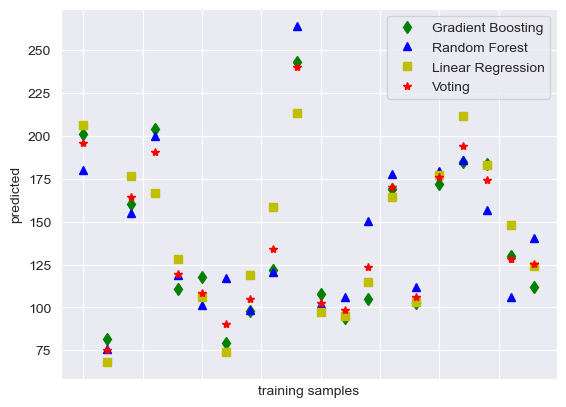

In [3]:
xt = X[:20]
gb_pred = gbreg.predict(xt)
rf_pred = rfreg.predict(xt)
l_pred = lreg.predict(xt)
vot_pred = votreg.predict(xt)

plt.figure()
plt.plot(gb_pred, "gd", label="Gradient Boosting")
plt.plot(rf_pred, "b^", label="Random Forest")
plt.plot(l_pred, "ys", label="Linear Regression")
plt.plot(vot_pred, "r*", label="Voting")

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend()
plt.show()

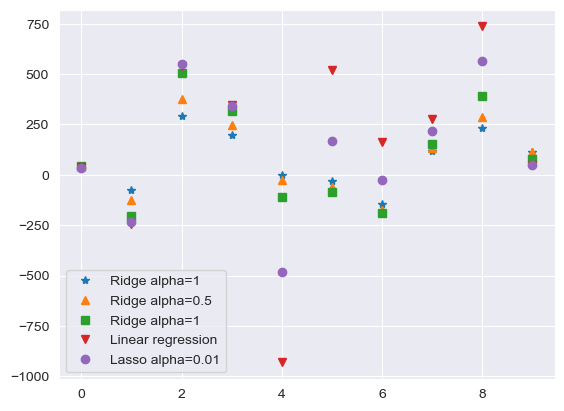

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear = linear_model.LinearRegression()
reg_one = linear_model.Ridge(alpha=1)
reg_half = linear_model.Ridge(alpha=0.5)
reg_small = linear_model.Ridge(alpha=0.1)
reg_lasso = linear_model.Lasso(alpha=0.01, max_iter=100000)
reg_one.fit(X_train, y_train)
reg_half.fit(X_train, y_train)
reg_small.fit(X_train, y_train)
linear.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)

plt.figure()
plt.plot(reg_one.coef_, '*', label="Ridge alpha=1")
plt.plot(reg_half.coef_, '^', label="Ridge alpha=0.5")
plt.plot(reg_small.coef_, 's', label="Ridge alpha=1")
plt.plot(linear.coef_, 'v', label="Linear regression")
plt.plot(reg_lasso.coef_, 'o', label="Lasso alpha=0.01")
plt.legend()
plt.show()


In [6]:
## RFE
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
## 重要特征
print(clf.feature_importances_)
print(classification_report(y_test, y_pred, zero_division=np.nan))
rfe = RFE(estimator=clf, n_features_to_select=3)
### 递归特征消除(Recursive Feature Elimination)
X_rfe = rfe.fit_transform(X_train, y_train)
print(X_rfe)

[0.10901234 0.02887585 0.12636259 0.11413647 0.11004785 0.1116242
 0.11239155 0.05581893 0.12047445 0.11125577]
              precision    recall  f1-score   support

        37.0        nan      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00       nan      0.00       0.0
        48.0        nan      0.00      0.00       2.0
        49.0       0.00       nan      0.00       0.0
        51.0       0.00       nan      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        53.0       0.00       nan      0.00       0.0
        55.0       0.00       nan      0.00       0.0
        58.0       0.00       nan      0.00       0.0
        59.0       0.00       nan      0.00       0.0
        60.0        nan      0.00      0.00       1.0
        61.0        nan      0.00      0.00       1.0
        63.0        nan      0.00      0.00       2.0
        64.0        nan      0.00      0.00       1.0
        65.0       0.00

In [7]:
## PCA

from sklearn.decomposition import PCA

## 主成分分析
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print(X_pca)

[[ 1.03801341e-01 -5.27859810e-03]
 [ 4.36645879e-02 -7.18705880e-02]
 [ 2.38996086e-02 -1.10655195e-02]
 [-1.62180317e-01  2.44851790e-03]
 [-1.65749372e-01  3.51293815e-02]
 [-1.71866679e-01  4.77590778e-02]
 [ 1.57084529e-02 -3.44937952e-03]
 [ 1.34455690e-01 -7.05319227e-02]
 [ 5.79907886e-03 -2.63961265e-02]
 [-1.21250857e-01  6.31143392e-02]
 [-8.47107923e-02  6.87002098e-02]
 [ 5.38875302e-02 -4.31146099e-02]
 [-8.03022159e-02 -1.31548695e-01]
 [ 1.05744619e-01 -4.82568620e-02]
 [-1.21826648e-01 -7.66705492e-02]
 [ 4.49430752e-02  5.27528014e-03]
 [-1.90534009e-01 -1.13175126e-02]
 [-1.58349714e-02 -2.02701328e-02]
 [ 1.44529128e-02 -1.71965894e-02]
 [ 6.54451163e-02  1.11848123e-01]
 [-5.94488304e-02 -3.83210230e-02]
 [ 3.12195108e-02 -3.47234817e-02]
 [ 8.23874105e-03  5.56765916e-02]
 [ 8.47663872e-02  3.20107674e-02]
 [ 1.12467869e-01  4.92020041e-02]
 [ 7.25814528e-02 -5.51762172e-02]
 [ 2.85417533e-03  9.78262735e-03]
 [-5.63151818e-02 -2.16015418e-02]
 [-3.55598147e-02 -6

In [8]:
## 线性判别分析

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 线性判别分析
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
print(X_lda)

[[ 9.13129620e-01 -4.10938031e-01]
 [-5.04604285e-01  2.22239507e+00]
 [ 2.69901541e+00 -1.89749139e+00]
 [-1.25371223e+00 -9.27995406e-01]
 [-2.14350772e+00 -2.84326735e-01]
 [-2.96336742e+00  1.14274013e-01]
 [ 1.25467666e+00 -1.01729079e-01]
 [ 3.06139680e+00  4.51110950e-01]
 [ 7.88715303e-01  1.24979498e+00]
 [-1.32615919e+00 -1.59197795e+00]
 [-2.97190205e+00  6.80631691e-01]
 [ 1.69284655e+00 -9.39132320e-01]
 [-1.43399870e+00  1.67648235e+00]
 [ 4.09668276e+00 -2.54207158e-01]
 [-6.46566333e-01 -9.66841292e-01]
 [-7.79246603e-02  1.73468080e-01]
 [-5.13694411e-01 -1.88099066e+00]
 [-4.99862392e-01 -8.87268163e-01]
 [-7.32951729e-01 -9.23467734e-01]
 [ 1.46195796e-01  3.21460523e-02]
 [ 1.05882239e+00 -1.40546356e+00]
 [-1.53205001e+00  2.68057514e+00]
 [ 1.71378457e+00 -1.63580445e+00]
 [ 1.50985006e+00 -1.35984478e+00]
 [ 1.39464116e+00  8.95734790e-01]
 [ 1.24624729e+00  1.17002427e+00]
 [ 4.03093333e-01  4.93286978e-01]
 [ 3.41353691e-02  3.92330436e-01]
 [-2.70066020e-01 -2

In [9]:
from sklearn.impute import SimpleImputer
## 均值填充
imputer = SimpleImputer(strategy='mean')
X_imputer = imputer.fit_transform(X_train)
print(X_imputer)

[[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


In [11]:
### 数据不平衡

## 上采样 --- 增加少量样本的数量
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# print(X_resampled.shape, y_resampled.shape)

## 下采样 --- 减少多数样本的数量
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_resampled_1, y_resampled_1 = under_sampler.fit_resample(X_train, y_train)
print(X_resampled_1.shape, y_resampled_1.shape)

(199, 10) (199,)


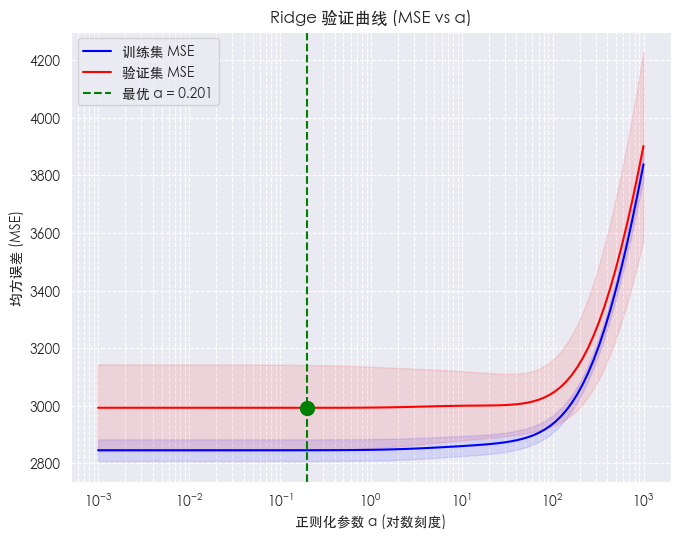

In [14]:
## 验证曲线
## 验证曲线（Validation Curve）是一种用于评估模型性能随超参数变化的工具

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['STHeiTi']
plt.rcParams['axes.unicode_minus'] = False

# 加载糖尿病数据集
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 设置 alpha 范围
alphas = np.logspace(-3, 3, 100)  # 从 0.001 到 1000

# 计算验证曲线
train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=alphas,
    cv=5, scoring="neg_mean_squared_error"
)

# 转换为 MSE（取负值，因为 scoring 返回负 MSE）
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
valid_mse_std = valid_scores.std(axis=1)

# 找到最优 alpha（验证集 MSE 最小）
optimal_idx = np.argmin(valid_mse)
optimal_alpha = alphas[optimal_idx]
optimal_mse = valid_mse[optimal_idx]

# 创建画布
fig = plt.figure(figsize=(8, 6))

# 自由布局：绘制验证曲线
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
ax.plot(alphas, train_mse, 'b-', label='训练集 MSE')
ax.plot(alphas, valid_mse, 'r-', label='验证集 MSE')
ax.fill_between(alphas, train_mse - train_mse_std, train_mse + train_mse_std, color='blue', alpha=0.1)
ax.fill_between(alphas, valid_mse - valid_mse_std, valid_mse + valid_mse_std, color='red', alpha=0.1)
ax.axvline(optimal_alpha, color='g', linestyle='--', label=f'最优 α = {optimal_alpha:.3f}')
ax.scatter([optimal_alpha], [optimal_mse], color='green', s=100, zorder=5)
ax.set_xscale('log')  # alpha 使用对数刻度
ax.set_xlabel('正则化参数 α (对数刻度)')
ax.set_ylabel('均方误差 (MSE)')
ax.set_title('Ridge 验证曲线 (MSE vs α)')
ax.legend()
ax.grid(True, which="both", ls="--")

plt.show()

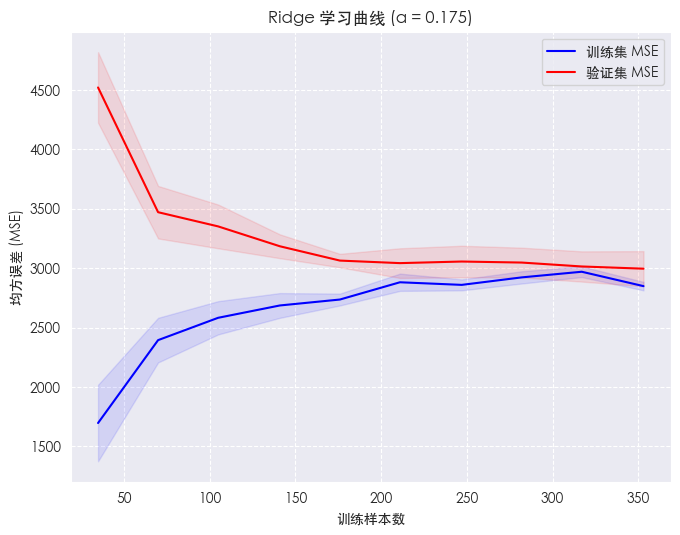

In [15]:
## 学习曲线
## 学习曲线（Learning Curve）是机器学习中用于评估模型性能随训练样本量变化的工具
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# 加载糖尿病数据集
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 使用 RidgeCV 找到最优 alpha
alphas = np.logspace(-3, 3, 100)  # 从 0.001 到 1000
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X, y)
optimal_alpha = ridge_cv.alpha_

# 设置学习曲线参数
train_sizes = np.linspace(0.1, 1.0, 10)  # 从 10% 到 100% 的训练样本
train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=optimal_alpha), X, y, train_sizes=train_sizes,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# 转换为 MSE（取负值，因为 scoring 返回负 MSE）
train_mse = -train_scores.mean(axis=1)
valid_mse = -valid_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
valid_mse_std = valid_scores.std(axis=1)

# 创建画布
fig = plt.figure(figsize=(8, 6))

# 自由布局：绘制学习曲线
ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
ax.plot(train_sizes, train_mse, 'b-', label='训练集 MSE')
ax.plot(train_sizes, valid_mse, 'r-', label='验证集 MSE')
ax.fill_between(train_sizes, train_mse - train_mse_std, train_mse + train_mse_std, color='blue', alpha=0.1)
ax.fill_between(train_sizes, valid_mse - valid_mse_std, valid_mse + valid_mse_std, color='red', alpha=0.1)
ax.set_xlabel('训练样本数')
ax.set_ylabel('均方误差 (MSE)')
ax.set_title(f'Ridge 学习曲线 (α = {optimal_alpha:.3f})')
ax.legend()
ax.grid(True, which="both", ls="--")

plt.show()